# Regressão Logística Multinomial

Para esta atividade usaremos um conjunto de dados sobre métricas do coração de pacientes, com o objetivo de determinar se o paciente é normal, suspeito ou com doença patológica. O conjunto de dado pode ser encontrado no [GitHub](https://raw.githubusercontent.com/bkrai/R-files-from-YouTube/main/Cardiotocographic.csv) de alguns usuários.

Abaixo encontra-se o dicionário de dados:

* LB: baseline value (SisPorto)
* AC: accelerations (SisPorto)
* FM: foetal movement (SisPorto)
* UC: uterine contractions (SisPorto)
* DL: light decelerations
* DS: severe decelerations
* DP: prolongued decelerations
* ASTV: percentage of time with abnormal short term variability (SisPorto)
* mSTV: mean value of short term variability (SisPorto)
* ALTV: percentage of time with abnormal long term variability (SisPorto)
* mLTV: mean value of long term variability (SisPorto)
* Width: histogram width
* Min: low freq. of the histogram
* Max: high freq. of the histogram
* Nmax: number of histogram peaks
* Nzeros: number of histogram zeros
* Mode: histogram mode
* Mean: histogram mean
* Median: histogram median
* Variance: histogram variance
* Tendency: histogram tendency: -1=left assymetric; 0=symmetric; 1=right assymetric
* NSP: Normal=0; Suspect=1; Pathologic=2


O objetivo é entender/prever a variável `NSP` em função das demais.

Obs: Não se preocupe se não entender o significado de cada variável, estamos lidando com um problema técnico e provavelmente você não terá um especialista na área e nem tempo suficiente para entender sobre a área de negócio para este exercício. Foque na construção do modelo de regressão logística.

## Atividade 1: Importe o conjunto de dados, verifique se há dados faltantes e a correlação entre as variáveis.

In [143]:
# importando biblioecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [144]:
# importando o conjunto de dados
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_excel('/content/drive/MyDrive/ArquivosColab/cardio.xlsx')

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0.000000,0.0,0.000000,0.000000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,1
1,132,0.006380,0.0,0.006380,0.003190,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,0
2,133,0.003322,0.0,0.008306,0.003322,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,0
3,134,0.002561,0.0,0.007682,0.002561,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,0
4,132,0.006515,0.0,0.008143,0.000000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,0


In [145]:
# verificando dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   int64  
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 13  Max       2126 non-null   int64  
 14  Nmax      2126 non-null   int64  
 15  Nzeros    2126 non-null   int64  
 16  Mode      2126 non-null   int64  
 17  Mean      2126 non-null   int64  
 18  Median    2126 non-null   int64  
 19  Variance  2126 non-null   int64  
 20  Tendency  2126 non-null   int6

In [146]:
# verificando discritivo do DataFrame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LB,2126.0,133.303857,9.840844,106.0,126.000000,133.000000,140.000000,160.000000
AC,2126.0,0.003170,0.003860,0.0,0.000000,0.001630,0.005631,0.019284
FM,2126.0,0.009474,0.046670,0.0,0.000000,0.000000,0.002512,0.480634
UC,2126.0,0.004357,0.002940,0.0,0.001876,0.004482,0.006525,0.014925
DL,2126.0,0.001885,0.002962,0.0,0.000000,0.000000,0.003264,0.015385
DS,2126.0,0.000004,0.000063,0.0,0.000000,0.000000,0.000000,0.001353
DP,2126.0,0.000157,0.000580,0.0,0.000000,0.000000,0.000000,0.005348
ASTV,2126.0,46.990122,17.192814,12.0,32.000000,49.000000,61.000000,87.000000
MSTV,2126.0,1.332785,0.883241,0.2,0.700000,1.200000,1.700000,7.000000
ALTV,2126.0,9.846660,18.396880,0.0,0.000000,0.000000,11.000000,91.000000


In [147]:
# checando dataframe
df.shape

(2126, 22)

In [148]:
# checando se existem dados faltantes
df.isna().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
NSP         0
dtype: int64

In [149]:
# verificando a correlação
df.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
LB,1.000000,-0.080862,-0.033350,-0.146372,-0.158845,-0.054799,-0.105236,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
AC,-0.080862,1.000000,0.046949,0.086653,-0.110934,-0.043733,-0.131007,-0.280089,0.207595,-0.374335,...,-0.154934,0.393712,0.189319,-0.006412,0.243845,0.270496,0.272948,0.126380,0.029341,-0.363849
FM,-0.033350,0.046949,1.000000,-0.069981,0.050401,-0.010824,0.265627,-0.103721,0.121213,-0.074190,...,-0.153883,0.099619,0.164450,-0.017855,-0.061042,-0.089502,-0.072175,0.179309,-0.001295,0.087933
UC,-0.146372,0.086653,-0.069981,1.000000,0.287032,0.006751,0.087898,-0.229072,0.286907,-0.308000,...,-0.111860,0.120195,0.081860,0.057815,-0.106559,-0.190340,-0.142111,0.238755,-0.074167,-0.203824
DL,-0.158845,-0.110934,0.050401,0.287032,1.000000,0.115216,0.231103,-0.117416,0.563260,-0.272250,...,-0.553921,0.217002,0.397183,0.235296,-0.350232,-0.530564,-0.390822,0.567483,-0.000102,0.062702
DS,-0.054799,-0.043733,-0.010824,0.006751,0.115216,1.000000,0.009848,0.037306,0.034632,-0.030506,...,-0.071670,-0.021600,0.006892,0.049462,-0.216356,-0.162154,-0.165038,0.132999,-0.074977,0.135629
DP,-0.105236,-0.131007,0.265627,0.087898,0.231103,0.009848,1.000000,0.048813,0.268688,-0.138521,...,-0.278293,0.120019,0.221066,0.057278,-0.437137,-0.492250,-0.448311,0.505023,-0.218177,0.488277
ASTV,0.305570,-0.280089,-0.103721,-0.229072,-0.117416,0.037306,0.048813,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
MSTV,-0.279607,0.207595,0.121213,0.286907,0.563260,0.034632,0.268688,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
ALTV,0.285630,-0.374335,-0.074190,-0.308000,-0.272250,-0.030506,-0.138521,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


## Atividade 2: Verifique se a variável está balanceada. Utiliza o metodo Smote para fazer o balanceamento, se for necessário.

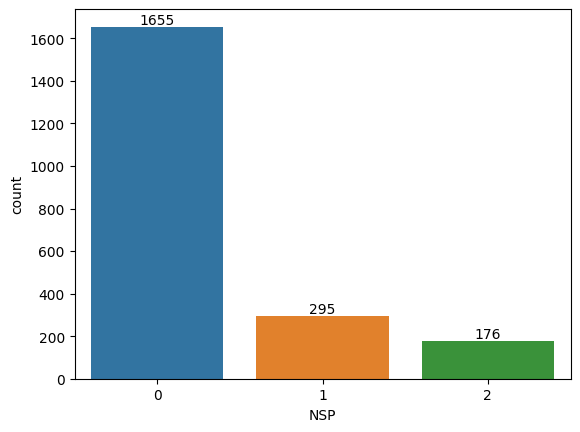

In [150]:
# verificando se está balanceado os dados
verifica = sns.countplot(x=df['NSP']);
verifica.bar_label(verifica.containers[0])
plt.show()

* **Comentário:** O gráfico mostra que a variável está muito descabalanceada, necessitando de um metodo como o Smote para realizar o balanceamento da mesma.

## Atividade 3: Use as variáveis que achar relevante e separe as variáveis em $X$ e $y$, a seguir crie um modelo de regressão logística.

* **Comentário:** Em minhas analises, todas essas váriaveis são importante, mas para uma melhor precisão vou pegar as que tenha correlação maior que 0,20 com a variável NSP.

In [151]:
# pegando variaveis com correlação maior que 0.20 em referencia ao NSP
correlacao_NSP = df.corr()['NSP'].to_frame().reset_index()
selecao_colunas = list(correlacao_NSP[abs(correlacao_NSP.NSP)>0.20]['index'])

# mesmo com baixa correlação, adicionando a Tendency por ser importante ao modelo
selecao_colunas.append('Tendency')

In [152]:
# verificando quais colunas ficaram
selecao_colunas

['AC',
 'UC',
 'DP',
 'ASTV',
 'ALTV',
 'MLTV',
 'Mode',
 'Mean',
 'Median',
 'Variance',
 'NSP',
 'Tendency']

In [153]:
# atualizando o DataFrame com a variaveis selecionadas
df = df[selecao_colunas]

In [154]:
# separando as variáveis X e y
X = df.drop('NSP', axis=1)
y = df['NSP']

In [155]:
# balanceando as classes com SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X, y = smote.fit_resample(X, y)

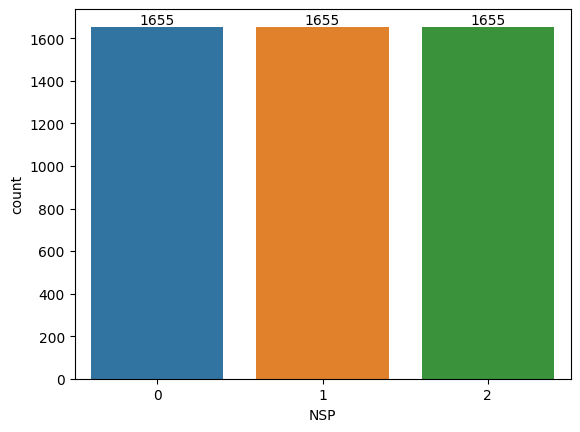

In [156]:
# verificando se está balanceado os dados
verifica = sns.countplot(x=y);
verifica.bar_label(verifica.containers[0])
plt.show()

In [157]:
# importando o statsmodels para criar o modelo de regressão logística
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import MNLogit

In [158]:
X = sm.add_constant(X, has_constant='add')

In [159]:
# criando modelo de regressão logística
modelo = MNLogit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.367722
         Iterations 14


## Atividade 4: Faça previsões e avalie o modelo.

In [160]:
# predizendo cada NSP
modelo.predict(X)

,0,1,2
0,7.030609e-05,0.052859,9.470710e-01
1,9.998723e-01,0.000128,1.363699e-09
2,9.988890e-01,0.001111,4.588574e-08
3,9.985791e-01,0.001421,7.230418e-08
4,9.999551e-01,0.000045,2.865825e-10
...,...,...,...
4960,1.847608e-03,0.291952,7.062000e-01
4961,2.211840e-08,0.001658,9.983415e-01
4962,4.540440e-02,0.262491,6.921046e-01
4963,1.846869e-01,0.343623,4.716898e-01


In [161]:
y_pred = modelo.predict(X).idxmax(axis=1)

In [162]:
print(modelo.summary())

                          MNLogit Regression Results                          
Dep. Variable:                    NSP   No. Observations:                 4965
Model:                        MNLogit   Df Residuals:                     4941
Method:                           MLE   Df Model:                           22
Date:                Fri, 11 Aug 2023   Pseudo R-squ.:                  0.6653
Time:                        15:33:10   Log-Likelihood:                -1825.7
converged:                       True   LL-Null:                       -5454.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
     NSP=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.4896      1.044    -18.669      0.000     -21.536     -17.443
AC          -891.3443     55.485    -16.064      0.000   -1000.094    -782.595
UC          -232.7595     25.749     -9.040      0.0

In [163]:
# importante bibliotecas e gerando matriz de confusão
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y, y_pred)
matriz_confusao

array([[1431,  181,   43],
       [  86, 1366,  203],
       [  27,  208, 1420]])

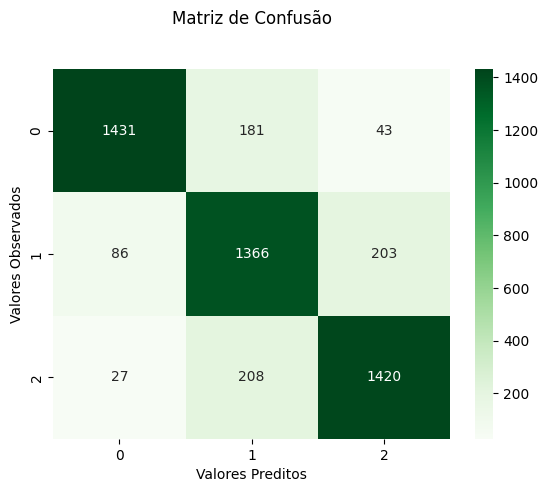

In [164]:
# criando mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

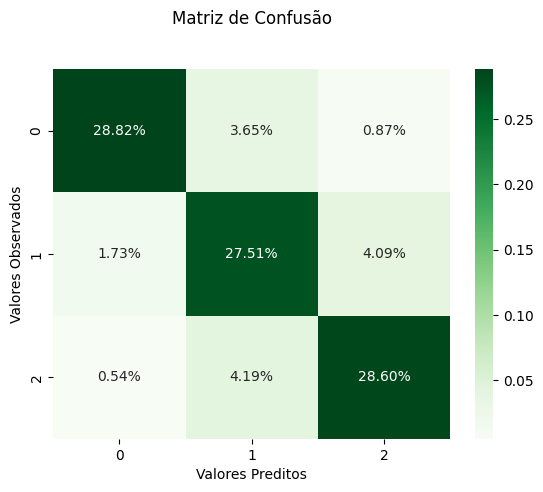

In [165]:
# mapa de calor em porcentagem
import numpy as np

sns.heatmap(matriz_confusao/np.sum(matriz_confusao),
            annot=True, fmt='.2%', cmap='Greens')
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

* **Comentário:** Com o balanceamento as porcentagens ficaram bem próximas!


In [166]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      1655
           1       0.78      0.83      0.80      1655
           2       0.85      0.86      0.86      1655

    accuracy                           0.85      4965
   macro avg       0.85      0.85      0.85      4965
weighted avg       0.85      0.85      0.85      4965



* **Comentário:** Podemos ver que a acurária é de 0,85, indicando que o modelo acerta 85% da previsões.

In [167]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score, auc

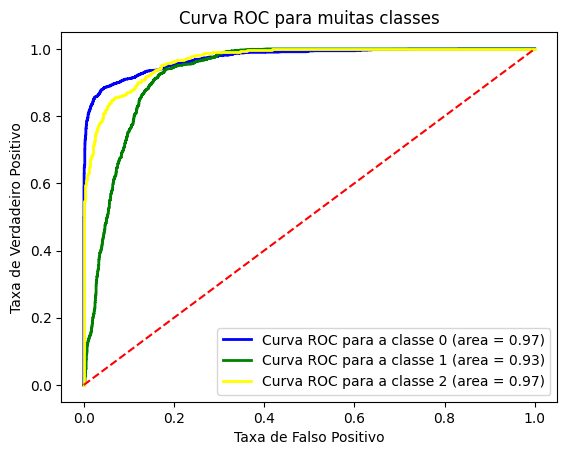

In [168]:
y_cat = label_binarize(y, classes=[0, 1, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3
colors = ['blue','green','yellow']

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_cat[:, i], modelo.predict(X).iloc[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Curva ROC para a classe {i} (area = {round(roc_auc[i], 2)})')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC para muitas classes')
plt.legend(loc="lower right");

* **Comentário:** De acordo com a curva ROC, o modelo funciona melhor em algumas classes do que em outras, mas no geral está muito linear.

## Atividade 5: Faça a previsão para um paciente que apresenta as seguintes características:

* `LB` = 121
* `AC` = 0.004176
* `FM` = 0.0
* `UC` = 0.007541
* `DL` = 0.003176
* `DS` = 0.0
* `DP` = 0.0
* `ASTV` = 20
* `mSTV` = 2.3
* `ALTV` = 0
* `mLTV` = 11.5
* `Width` = 129
* `Min` = 54
* `Max` = 171
* `Nmax` = 5
* `Nzeros` = 0
* `Mode` = 140
* `Mean` = 136
* `Median` = 123
* `Variance` = 14
* `Tendency` = 1

In [169]:
# Transformando as características acima em um DataFrame
verifica_paciente = pd.DataFrame({
    'LB': [121.0],
    'AC':  [0.004176],
    'FM':  [0.0],
    'UC':  [0.007541],
    'DL':  [0.003176],
    'DS':  [0.0],
    'DP':  [0.0],
    'ASTV':  [20],
    'MSTV':  [2.3],
    'ALTV':  [0],
    'MLTV':  [11.5],
    'Width':  [129],
    'Min': [54],
    'Max':  [171],
    'Nmax': [5],
    'Nzeros': [0],
    'Mode': [140],
    'Mean':  [136],
    'Median': [123],
    'Variance': [14],
    'Tendency': [1],
}, index=[0])

# Exibindo o DataFrame das características
verifica_paciente.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
0,121.0,0.004176,0.0,0.007541,0.003176,0.0,0.0,20,2.3,0,...,129,54,171,5,0,140,136,123,14,1


In [170]:
X.iloc[0]

const         1.0
AC            0.0
UC            0.0
DP            0.0
ASTV         73.0
ALTV         43.0
MLTV          2.4
Mode        120.0
Mean        137.0
Median      121.0
Variance     73.0
Tendency      1.0
Name: 0, dtype: float64

In [171]:
selecao_colunas.remove('NSP')  # Remove 'NSP' da lista de seleção de colunas

In [183]:
verifica_paciente['const'] = 1

# Movendo a coluna 'const' para ser a primeira coluna
selecao_colunas = ['const'] + [col for col in X if col != 'const']

# Seleciona as colunas restantes em verifica_fraude
verifica_paciente = verifica_paciente[selecao_colunas]

In [184]:
verifica_paciente.iloc[0]

const         1.000000
AC            0.004176
UC            0.007541
DP            0.000000
ASTV         20.000000
ALTV          0.000000
MLTV         11.500000
Mode        140.000000
Mean        136.000000
Median      123.000000
Variance     14.000000
Tendency      1.000000
Name: 0, dtype: float64

In [185]:
# prevendo se é fraude ou não
modelo.predict(verifica_paciente.iloc[0])

,0,1,2
None,0.999324,0.000676,7.040460e-09


* **Comentário:** Com o 0 beirando o 1, o modelo previu que o paciente está Normal!